In [97]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from math import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [98]:
# Parse CSV
data = np.genfromtxt('./diabetes.csv', delimiter=',')
data = np.delete(data, 0, axis=0)
labels = data[:, -1]
data = np.delete(data, -1, axis=1)

print(np.shape(data))
print(np.shape(labels))

(768, 8)
(768,)


In [99]:
# Preprocess Data
data_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

encoder = OneHotEncoder(sparse=False)

x_train, x_test, y_train, y_test = train_test_split(data_norm, labels, test_size=0.20)
y_train_enc = encoder.fit_transform(y_train.reshape(-1,1))
y_test_enc = encoder.fit_transform(y_test.reshape(-1,1))
class_names = ['Has Diabetes', 'No Diabetes']

print("Sample train data: {}".format(x_train[:1]))
print("Sample train labels: {}".format(y_train_enc[:1]))

Sample train data: [[0.17647059 0.86934673 0.63934426 0.39393939 0.21867612 0.50372578
  0.38087105 0.16666667]]
Sample train labels: [[0. 1.]]


Final test set loss: 0.553421
Final test set accuracy: 0.714286
              precision    recall  f1-score   support

Has Diabetes       0.74      0.87      0.80       103
 No Diabetes       0.61      0.39      0.48        51

    accuracy                           0.71       154
   macro avg       0.67      0.63      0.64       154
weighted avg       0.70      0.71      0.70       154



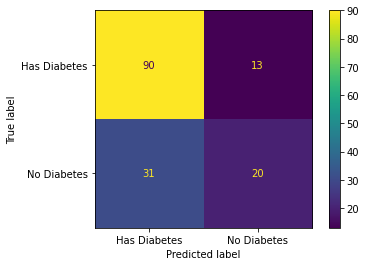

In [100]:
# 1 Hidden Layer, 1 nodes, 2 nodes in output layer
mlp = keras.models.Sequential()

mlp.add(Dense(3, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=100)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()

Final test set loss: 0.514289
Final test set accuracy: 0.714286
              precision    recall  f1-score   support

Has Diabetes       0.78      0.81      0.79       103
 No Diabetes       0.57      0.53      0.55        51

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



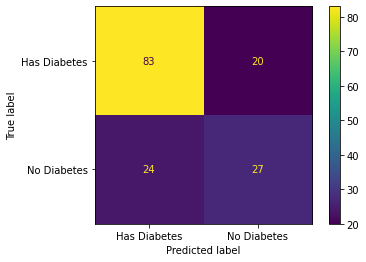

In [101]:
# 1 Hidden Layer, 1 nodes, 2 nodes in output layer
mlp = keras.models.Sequential()

mlp.add(Dense(10, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=100)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()

In [ ]:
# 1 Hidden Layer, 1 nodes, 2 nodes in output layer
mlp = keras.models.Sequential()

mlp.add(Dense(3, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(3, activation='relu', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=100)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()

Final test set loss: 0.486431
Final test set accuracy: 0.759740
              precision    recall  f1-score   support

Has Diabetes       0.81      0.84      0.82       103
 No Diabetes       0.65      0.59      0.62        51

    accuracy                           0.76       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.76      0.76       154



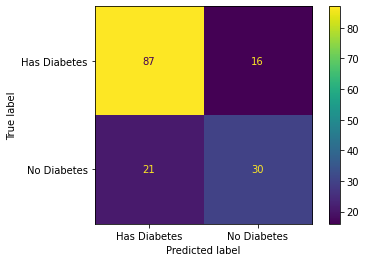

In [103]:
# 1 Hidden Layer, 1 nodes, 2 nodes in output layer
mlp = keras.models.Sequential()

mlp.add(Dense(10, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(3, activation='relu', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=100)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()

Final test set loss: 0.479775
Final test set accuracy: 0.733766
              precision    recall  f1-score   support

Has Diabetes       0.80      0.81      0.80       103
 No Diabetes       0.60      0.59      0.59        51

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



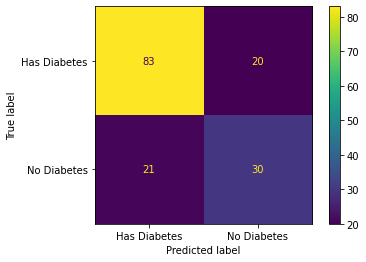

In [104]:
# 1 Hidden Layer, 1 nodes, 2 nodes in output layer
mlp = keras.models.Sequential()

mlp.add(Dense(10, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(10, activation='relu', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=200)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()

Final test set loss: 0.560588
Final test set accuracy: 0.746753
              precision    recall  f1-score   support

Has Diabetes       0.76      0.90      0.83       103
 No Diabetes       0.69      0.43      0.53        51

    accuracy                           0.75       154
   macro avg       0.72      0.67      0.68       154
weighted avg       0.74      0.75      0.73       154



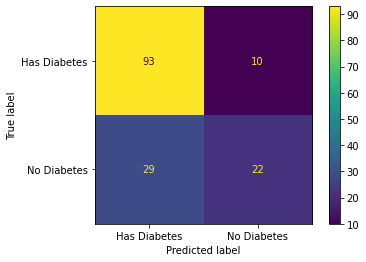

In [105]:
# 1 Hidden Layer, 1 nodes, 2 nodes in output layer
mlp = keras.models.Sequential()

mlp.add(Dense(32, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(10, activation='relu', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.0001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=200)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()

Final test set loss: 0.515268
Final test set accuracy: 0.720779
              precision    recall  f1-score   support

Has Diabetes       0.78      0.82      0.80       103
 No Diabetes       0.59      0.53      0.56        51

    accuracy                           0.72       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.71      0.72      0.72       154



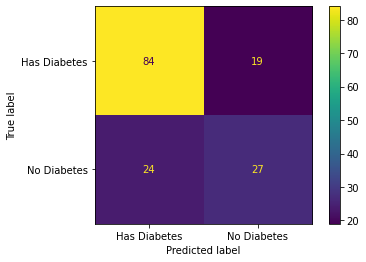

In [106]:
# 1 Hidden Layer, 1 nodes, 2 nodes in output layer
mlp = keras.models.Sequential()

mlp.add(Dense(32, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(64, activation='relu', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.0001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=200)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()